# Activity:
The distances that a runner has been run (in Mile) and the amount of water that he/she drinks (in Liters) is given
Do:
- Plot the scatter of distance versus water that consumed
- Find the best line that describes this relationship
- Plot the best line that you found

In [1]:
import numpy as np

# Distance run in miles
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Amount of water consumed in liters
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [2]:
# Lets use scikit learn to find the best line for us instead of coding it from scratch 

Text(0, 0.5, 'Water Drinks (Litre)')

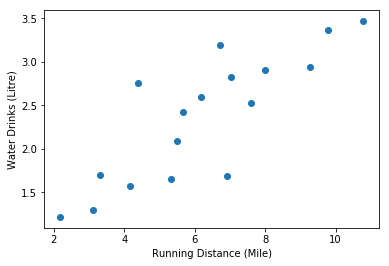

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

In [4]:
# always resphape your data
print(X.reshape(-1, 1))

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 5.654]
 [ 9.27 ]
 [ 3.1  ]]


In [9]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y) # reshape([rows, # features])
# -1 says I don't care about number of rows 
print(lr_reg.coef_)

print(lr_reg.intercept_)

[0.25163494]
0.7988012261753894


# Predict how much a runner will drink if they drink for 5 miles?

In [10]:
lr_reg.predict([[5.0]]) # this replaces our x value in our formula

array([2.05697595])

## obtain mean squared error without sklearn for the best line which is .251 as slope and .79 as intercept

In [15]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X,Y)

18.14486335294118

In [18]:
def min_sq_error(x,y,w1,w0):
    y_pred = [w1*i + w0 for i in x]
    error = [(i-j) for i,j in zip(y_pred, y)]
    sum_squared_error = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    N = len(y)
    mse = sum_squared_error/N
    return mse, error
print(min_sq_error(X, Y, .251, .79))


(0.1540226070715882, [-0.08169999999999988, -0.8655999999999997, 0.08050000000000024, -0.7157899999999997, 0.8354300000000001, 0.26316800000000007, -0.1214710000000001, -0.25431800000000004, 0.16509000000000018, 0.11291699999999993, -0.2694580000000002, 0.03354100000000049, 0.47356299999999996, -0.10675299999999988, -0.2108460000000001, 0.17676999999999987, 0.2681])


In [20]:
np.mean(min_sq_error(X, Y, 0.25163494, 0.79880123)[1])


-2.2857647095348205e-08

In [22]:
import scipy # statistics
import statsmodels.api as sm # advanced statistical models: regressions


In [23]:
x = sm.add_constant(X)
results = sm.OLS(Y,x).fit()
results.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     33.84
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           3.39e-05
Time:                        15:53:01   Log-Likelihood:                -8.2123
No. Observations:                  17   AIC:                             20.42
Df Residuals:                      15   BIC:                             22.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7988      0.288      2.775      0.014       0.185       1.412
x1             0.2516      0.043      5.817      0.000       0.159       0.344
==============================================================================
Omnibus:                        1.390   Durbin-Watson:                   2.353
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                0.261
Skew:                           0.222   Prob(JB):                        0.878
Kurtosis:                       3.414   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## Activity: How much companies' sales would be based on their product advertisement?
- We have a dataset of 200 companies, comprised of the top 150 companies, and the bottom 50 companies.

- The top companies (150) spent money to advertise their product on TV, radio and newspaper

- Based on their advertisments, they have calculated the sale that they had

- For the bottom companies (50), they want to have an estimation for the following: if they spend X dollar, Y dollar and Z dollar on TV, radio and newspaper, respectively, how much would their predicted sales be?

- We will use the top 150 companies in our dataset to train the model, and the bottom 50 companies to check that the model is working correctly

- In your group of 3, use the Advertising dataset and the starter code below to get started:

In [34]:
df = pd.read_csv("datasets/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv("datasets/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

# TODO: Instansiate the model (Linear Regression) and train it

# follow the usual sklearn pattern: import, instantiate, fit
sales_lr = LinearRegression()
sales_lr.fit(X_train,Y_train)

# print('Training Model intercept: ',sales_lr.intercept_)
# print('Coefficients for features: ',sales_lr.coef_)

# TODO: Predict the botton 50 companies' sales
x_test = df[feature_cols][-50:]
y_test = df.sales[-50:]

#print(sales_lr.predict(x_test))
print(r2_score(y_test, sales_lr.predict(x_test)))


0.8963519785440216


## Question: If a new company spends 100, 100 and 20 on TV, radio and newspaper, respectively on advertisement:
        
- How much sale it would have?

In [37]:
sales_lr.predict([[100, 100, 20]])

array([25.69498118])

## Check myself

In [38]:
import scipy # statistics
import statsmodels.api as sm # advanced statistical models: regressions

x = sm.add_constant(X_train)
results = sm.OLS(Y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     418.2
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           1.90e-71
Time:                        16:30:48   Log-Likelihood:                -291.75
No. Observations:                 150   AIC:                             591.5
Df Residuals:                     146   BIC:                             603.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0298      0.371      8.172      0.000       2.297       3.762
TV             0.0470      0.002     28.713      0.000       0.044       0.050
radio          0.1799      0.010     17.500      0.000       0.160       0.200
newspaper     -0.0014      0.007     -0.208      0.836      -0.015       0.012
==============================================================================
Omnibus:                       53.533   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.789
Skew:                          -1.458   Prob(JB):                     4.42e-31
Kurtosis:                       6.724   Cond. No.                         453.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""